# Optical Spectroscopy Visualization

Visualizations done with [Matplotlib](https://plotly.com/python/https://matplotlib.org/)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display

plt.style.use("../src/pitayasmoothie-dark.mplstyle")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

%matplotlib notebook

Load data

In [2]:
data = pd.read_fwf('../data/FMN concentrated time resolved__2018_01_16__12h14m54sdifference_spectra_glotaran_friendly.dat', sep=" ", header=None)

# 3D spectrum data source
# data = pd.read_fwf('../data/raw_data_vanadium.txt', sep=" ", header=None)

Create x and y axes

In [3]:
# for data which rows and columns names are defined in the first row and first colum
x = np.array(data.iloc[0,:].values)
y = np.array(data.iloc[:,0].values)
x = np.delete(x, 0)
y = np.delete(y, 0)
data = data.drop(data.index[0])
data = data.drop(data.columns[[0]], axis=1)

# # for data which has no row and column names
# # custom definition
# x = np.arange(0,229,2.3)
# y = np.flip(np.arange(4970,5005,0.26))


# # for default values
# # x = np.arange(data.shape[1])
# # y = np.arange(data.shape[0])

Edit data axes and value names

In [4]:
row_name = "raman shift"
col_name = "time"
val_name = "intensity"

In [5]:
x_grid, y_grid = np.meshgrid(x, y)

# Surface

<IPython.core.display.Javascript object>


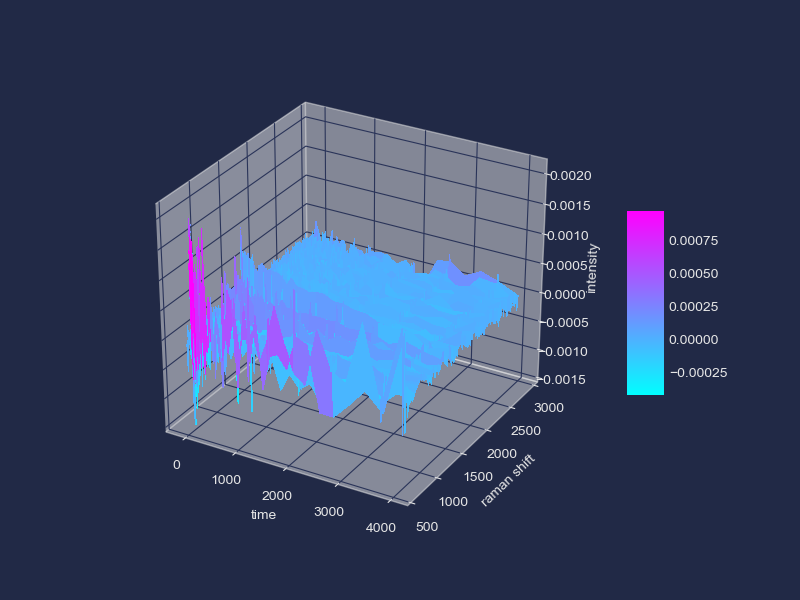

In [10]:
fig_surf = plt.figure(figsize=(8, 6))
ax = fig_surf.gca(projection='3d')

surf = ax.plot_surface(x_grid, y_grid, data, cmap="cool", linewidth=0, antialiased=False)
ax.set_xlabel(col_name)
ax.set_ylabel(row_name)
ax.set_zlabel(val_name)
fig_surf.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

## Heatmap

<IPython.core.display.Javascript object>


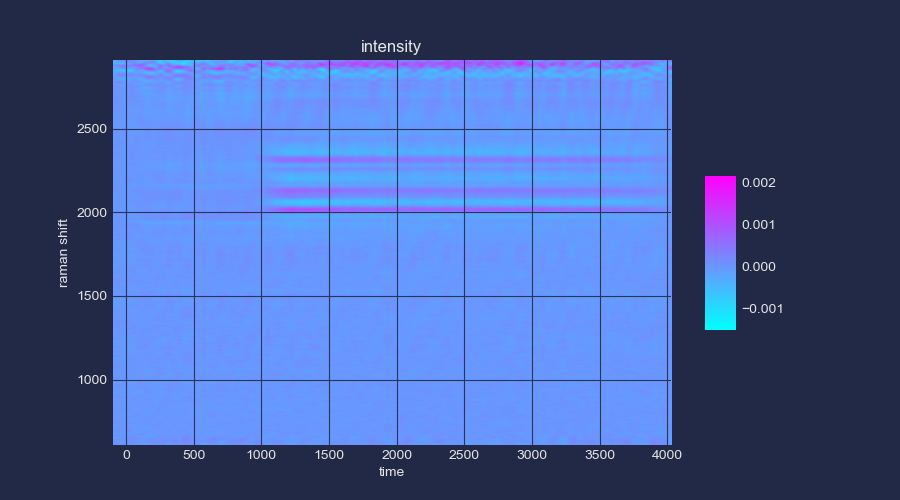

In [11]:
fig_heatmap = plt.figure(figsize=(9,5))
heatmap = plt.imshow(data, interpolation='bicubic',aspect="auto", extent=[x.min(),x.max(),y.min(),y.max()], cmap="cool")
plt.grid(True)
plt.colorbar(heatmap, shrink=0.4, aspect=5)
plt.xlabel(col_name)
plt.title(val_name)
plt.ylabel(row_name)
plt.show()

# Scatter points

Displayed for all time frames

<IPython.core.display.Javascript object>


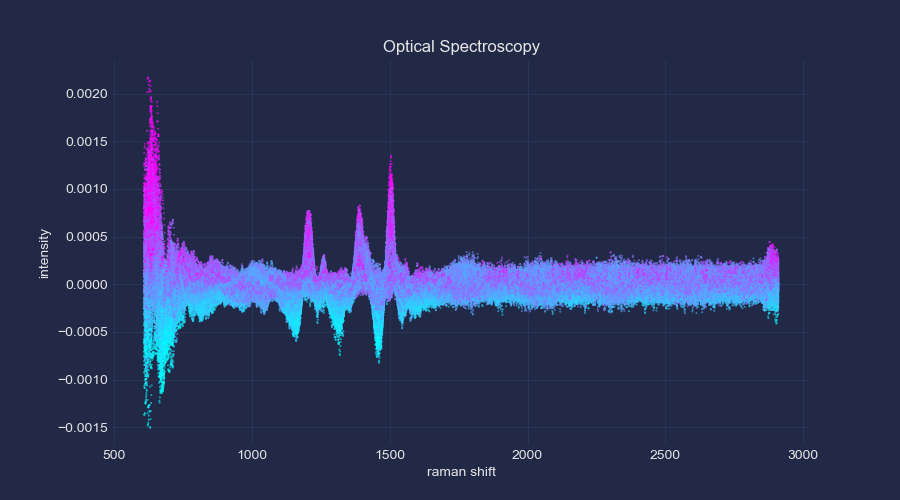

In [12]:
fig_points = plt.figure(figsize=(9, 5))
for t in range(len(x)):
     plt.scatter(y,data.iloc[:,t], c=data.iloc[:,t], s=0.1, cmap="cool")
plt.title('Optical Spectroscopy')
plt.xlabel(row_name)
plt.ylabel(val_name)
plt.show()

# Animated lines per *columns*

<IPython.core.display.Javascript object>


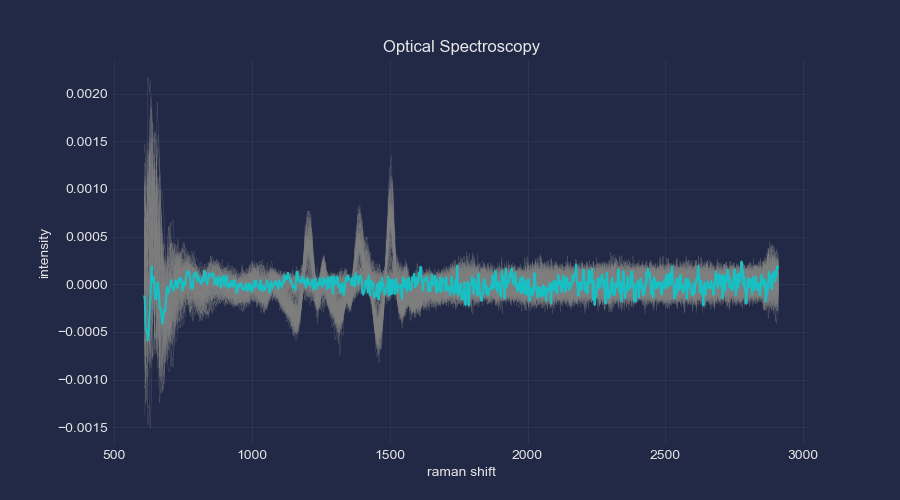

In [13]:
fig_lines_1 = plt.figure(figsize=(9, 5))
line_1, = plt.plot(y,data.iloc[:,0], label=f"time {0}", zorder=10, color=colors[0])

for t in range(len(x)):
     plt.plot(y,data.iloc[:,t], color="grey",zorder=1, linewidth=0.3, alpha=0.5)
        
plt.title('Optical Spectroscopy')
plt.xlabel(row_name)
plt.ylabel(val_name)
plt.show()

def time_changed_1(change):
    line_1.set_ydata(data.iloc[:,slider_1.value])
    fig_lines_1.canvas.draw_idle()
    label_1.value=f"{x[slider_1.value]}"

slider_1 = widgets.IntSlider(value=0, min=0, max=len(x)-1, step=1, description=col_name, readout=False)
slider_1.observe(time_changed_1, 'value')
label_1 = widgets.Label(value=f"{0}")
play_1 = widgets.Play(value=0, min=0, max=len(x)-1, step=1, interval=100, description="Press play", disabled=False)
widgets.jslink((play_1, 'value'), (slider_1, 'value'))
widgets.HBox([play_1, slider_1,label_1])


# Animated lines per *rows*

In [14]:
fig_lines_2 = plt.figure(figsize=(9, 5))
line_2, = plt.plot(data.iloc[0, :],x, label=f"time {0}", zorder=10, color=colors[1])

for r in range(len(y)):
     plt.plot(data.iloc[r,:],x, color="grey",zorder=1, linewidth=0.3, alpha=0.5)
        
plt.title('Optical Spectroscopy')
plt.xlabel(val_name)
plt.ylabel(col_name)
plt.show()

def time_changed_2(change):
    line_2.set_xdata(data.iloc[slider_2.value,:])
    fig_lines_2.canvas.draw_idle()
    label_2.value=f"{y[slider_2.value]}"

slider_2 = widgets.IntSlider(value=0, min=0, max=len(y)-1, step=1, description=row_name, readout=False)
slider_2.observe(time_changed_2, 'value')
play_2 = widgets.Play(value=0, min=0, max=len(y)-1, step=1, interval=100, description="Press play", disabled=False)
label_2 = widgets.Label(value=f"{0}")
widgets.jslink((play_2, 'value'), (slider_2, 'value'))
widgets.HBox([play_2, slider_2, label_2])

<IPython.core.display.Javascript object>